In [1]:
import pandas as pd 
df = pd.read_csv("E:\KRMU\Projects\Bank Customer Churn Prediction\Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Preprocessing the Data:

In [2]:
# Drop irrelevant features

df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [3]:
# Convert categorical variables into numerical data

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [4]:
# Checking any missing value 
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


# Exploratory Data Analysis (EDA):

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

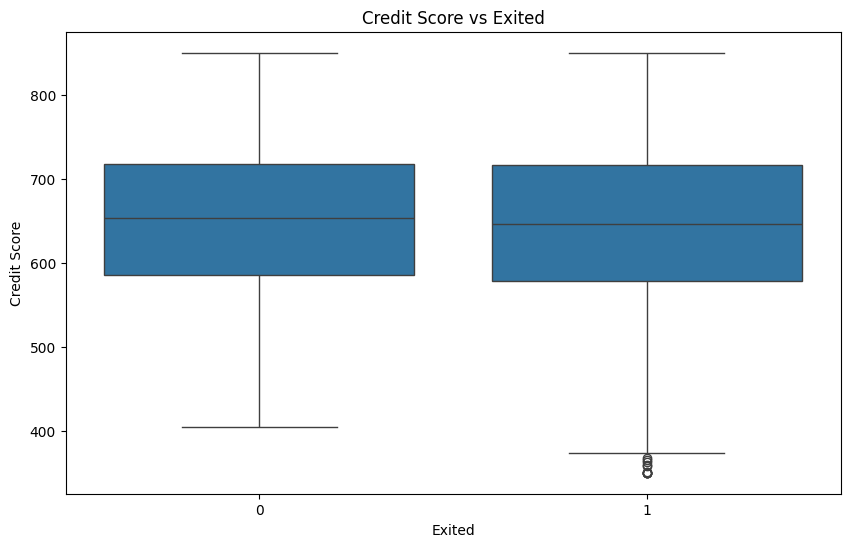

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='CreditScore', data=df)
plt.title('Credit Score vs Exited')
plt.xlabel('Exited')
plt.ylabel('Credit Score')
plt.show()

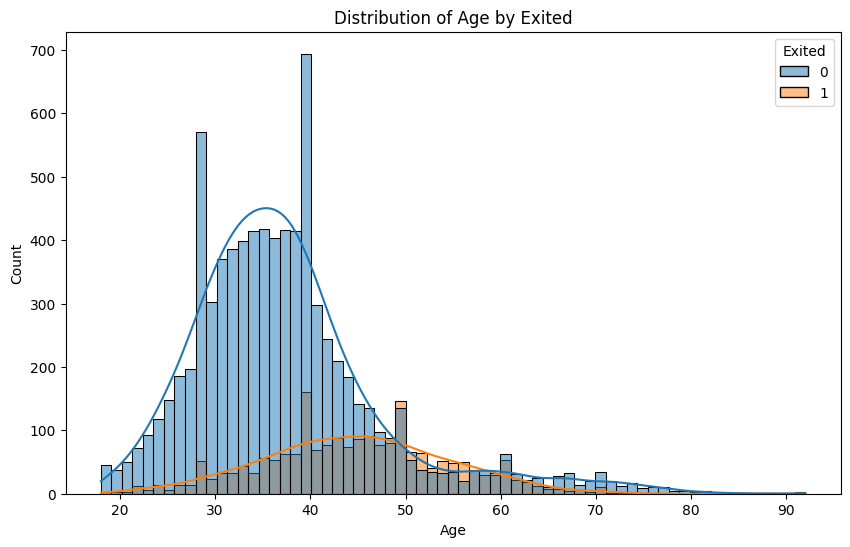

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Exited', kde=True)
plt.title('Distribution of Age by Exited')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

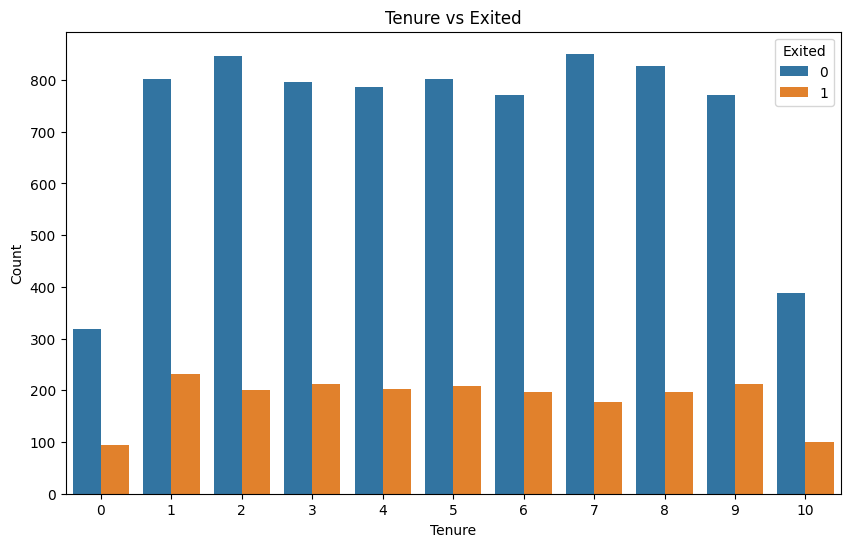

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Tenure', hue='Exited', data=df)
plt.title('Tenure vs Exited')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()

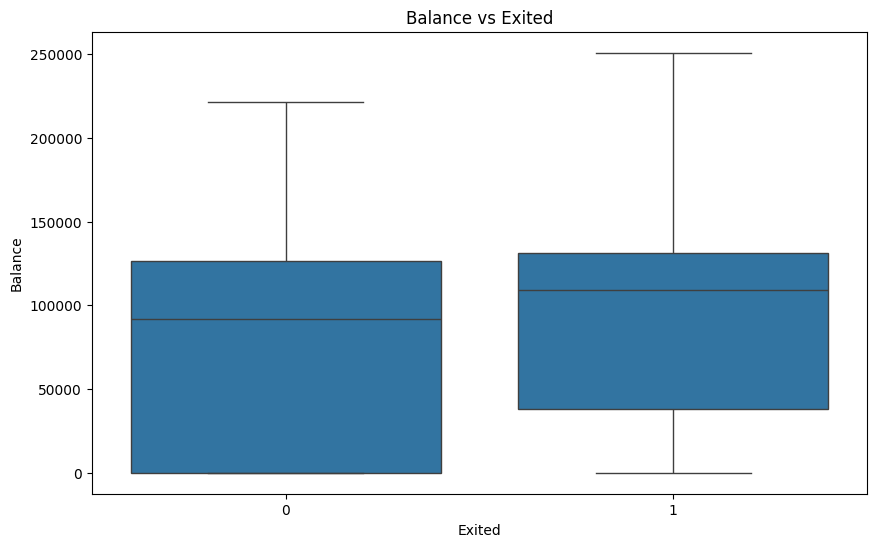

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Balance vs Exited')
plt.xlabel('Exited')
plt.ylabel('Balance')
plt.show()

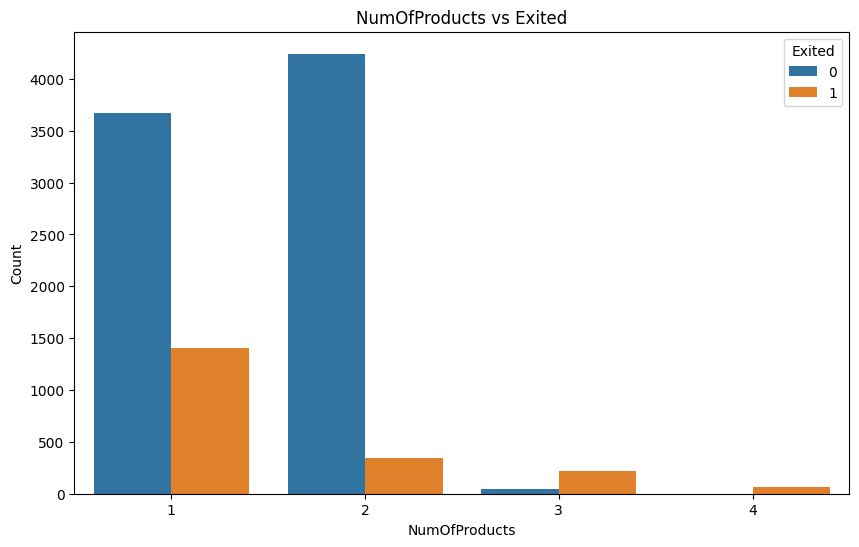

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.title('NumOfProducts vs Exited')
plt.xlabel('NumOfProducts')
plt.ylabel('Count')
plt.show()

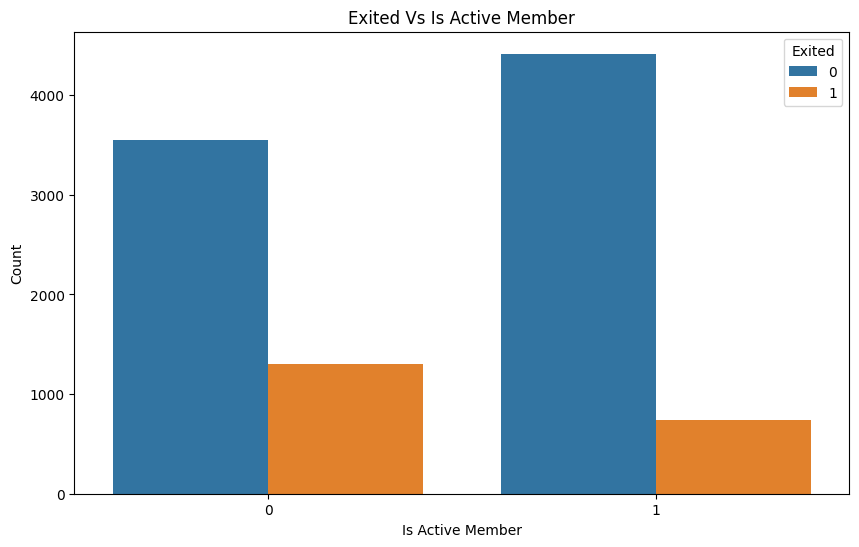

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='IsActiveMember', hue='Exited', data=df)
plt.title('Exited Vs Is Active Member')
plt.xlabel('Is Active Member')
plt.ylabel('Count')
plt.show()

# Splititting the data

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(['Exited'], axis=1)
y = df['Exited']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Model Building and Training

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [16]:
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print(f"Confusion Matrix for {name}:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

Training Logistic Regression...
Logistic Regression Accuracy: 0.8000
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      2003
           1       0.48      0.08      0.14       497

    accuracy                           0.80      2500
   macro avg       0.65      0.53      0.52      2500
weighted avg       0.75      0.80      0.74      2500

Confusion Matrix for Logistic Regression:
[[1958   45]
 [ 455   42]]


Training Decision Tree...
Decision Tree Accuracy: 0.7892
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      2003
           1       0.47      0.49      0.48       497

    accuracy                           0.79      2500
   macro avg       0.67      0.68      0.67      2500
weighted avg       0.79      0.79      0.79      2500

Confusion Matrix for Decision Tree:
[[1730  273]
 [ 254  243]

# From Above models Random Forest shows best accuracy i.e. 86%

In [17]:
# Optimizing and tuning the Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)


In [18]:
# Define parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [19]:
from sklearn.model_selection import GridSearchCV, cross_val_score


In [20]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [21]:
# Get the best parameters from grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [22]:
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)


In [23]:
# Train the model
best_rf_classifier.fit(X_train, y_train)


RandomForestClassifier(min_samples_leaf=4, n_estimators=200, random_state=42)

In [24]:
# Evaluate the model using cross-validation
cv_scores = cross_val_score(best_rf_classifier, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.86133333 0.85266667 0.87066667 0.86666667 0.854     ]
Mean CV Accuracy: 0.8610666666666666


In [25]:
from sklearn.feature_selection import SelectFromModel


In [26]:
# Feature selection based on feature importance
feature_importance = best_rf_classifier.feature_importances_
selected_features = SelectFromModel(best_rf_classifier, threshold='median')
selected_features.fit(X_train, y_train)
X_train_selected = selected_features.transform(X_train)
X_test_selected = selected_features.transform(X_test)

In [27]:
# Train the model with selected features
best_rf_classifier.fit(X_train_selected, y_train)

# Make predictions and evaluate the model
y_pred = best_rf_classifier.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8456


In [28]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1
